In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
pip install pandas_datareader

     |████████████████████████████████| 109 kB 4.8 MB/s            
     |████████████████████████████████| 6.4 MB 28.2 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras==2.6.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Machine Learning model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [6]:
start = '2014-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800.0,17.516609
2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600.0,17.131842
2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800.0,17.225262
2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200.0,17.102076
2014-01-08,19.484285,19.238930,19.243214,19.409286,258529600.0,17.210379


In [7]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800.0,17.516609
1,2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600.0,17.131842
2,2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800.0,17.225262
3,2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200.0,17.102076
4,2014-01-08,19.484285,19.238930,19.243214,19.409286,258529600.0,17.210379


In [8]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,19.893929,19.715000,19.845715,19.754642,234684800.0
1,19.775000,19.301071,19.745001,19.320715,392467600.0
2,19.528570,19.057142,19.194643,19.426071,412610800.0
3,19.498571,19.211430,19.440001,19.287144,317209200.0
4,19.484285,19.238930,19.243214,19.409286,258529600.0


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2010    153.3444
2011    153.6667
2012    153.9991
2013    154.3202
2014    154.6399
Name: Close, Length: 2015, dtype: float64

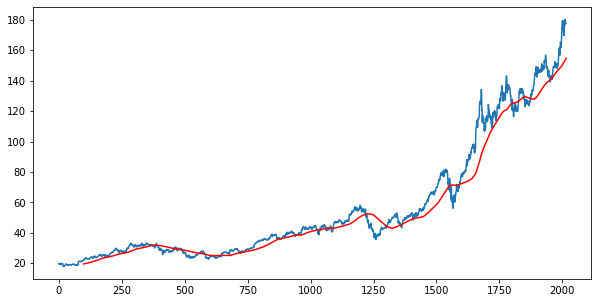

In [10]:
plt.figure(figsize = (10,5))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2010    142.85570
2011    143.13220
2012    143.40125
2013    143.66845
2014    143.95365
Name: Close, Length: 2015, dtype: float64

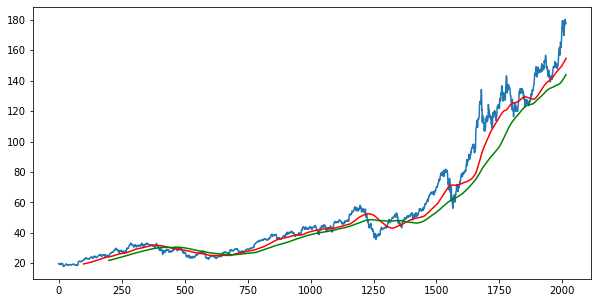

In [12]:
plt.figure(figsize = (10,5))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(2015, 5)

In [14]:
# Splitting the Data into Training and Testing
#75% for training and 25% for testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.75)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.75): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1511, 1)
(504, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0332882 ],
       [0.02570712],
       [0.02754778],
       ...,
       [0.96143304],
       [0.97073628],
       [1.        ]])

In [17]:
#empty array for training
#x train is the data we already have
# the predicted value will go into y_train
x_train = []
y_train = []

#insert value on the list/array
for i in range(100, data_training.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(1411, 100, 1)

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1))) #closing price column
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 60)

Epoch 1/60
45/45 [==============================] - 52s 1s/step - loss: 0.0305
Epoch 2/60
45/45 [==============================] - 46s 1s/step - loss: 0.0064
Epoch 3/60
45/45 [==============================] - 48s 1s/step - loss: 0.0055
Epoch 4/60
45/45 [==============================] - 45s 1s/step - loss: 0.0062
Epoch 5/60
45/45 [==============================] - 45s 1s/step - loss: 0.0049
Epoch 6/60
45/45 [==============================] - 49s 1s/step - loss: 0.0051
Epoch 7/60
45/45 [==============================] - 47s 1s/step - loss: 0.0047
Epoch 8/60
45/45 [==============================] - 45s 1s/step - loss: 0.0051
Epoch 9/60
45/45 [==============================] - 46s 1s/step - loss: 0.0044
Epoch 10/60
45/45 [==============================] - 47s 1s/step - loss: 0.0037
Epoch 11/60
45/45 [==============================] - 45s 991ms/step - loss: 0.0039
Epoch 12/60
45/45 [==============================] - 47s 1s/step - loss: 0.0036
Epoch 13/60
45/45 [===========================

In [23]:
model.save('keras_model.h5')

In [24]:
data_testing.head()

,Close
1511,74.357498
1512,74.949997
1513,74.597504
1514,75.797501
1515,77.407501


In [25]:
past_100_days = data_training.tail(100) #data for the past 100 days

In [26]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [27]:
final_df.head()

,Close
0,50.119999
1,52.242500
2,50.687500
3,50.435001
4,51.625000


In [28]:
#scaling down the data

input_data = scaler.fit_transform(final_df)

In [29]:
#Testing for the data
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [30]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(504, 100, 1)
(504,)


In [31]:
#For making predictions

y_predicted = model.predict(x_test)

In [32]:
y_predicted.shape

(504, 1)

In [33]:
y_test

array([0.18614161, 0.19069194, 0.18798483, 0.19720068, 0.20956533,
       0.21090928, 0.22363872, 0.21542123, 0.21284847, 0.22033636,
       0.22703712, 0.22288996, 0.22505955, 0.22799711, 0.2262307 ,
       0.20825976, 0.22504033, 0.23780815, 0.23690576, 0.20933494,
       0.20770295, 0.22726751, 0.23225945, 0.23947852, 0.22953306,
       0.2324514 , 0.22872665, 0.24329931, 0.23882574, 0.23897937,
       0.22755549, 0.23642577, 0.23005143, 0.21613161, 0.18758159,
       0.16818983, 0.17696413, 0.14023499, 0.13992779, 0.18879118,
       0.17057064, 0.19633667, 0.17748256, 0.17001383, 0.12612322,
       0.16292911, 0.14390215, 0.09167882, 0.1487789 , 0.08012059,
       0.10056832, 0.08868367, 0.08505492, 0.05521851, 0.04586821,
       0.08908688, 0.08647571, 0.11128179, 0.09073806, 0.10431227,
       0.10331387, 0.07762462, 0.0853429 , 0.07858461, 0.11901928,
       0.11318254, 0.12593121, 0.12961753, 0.13971662, 0.16621225,
       0.16118193, 0.16552109, 0.15805236, 0.14678211, 0.13034

In [34]:
scaler.scale_

array([0.0076799])

In [35]:
scale_factor = 1/0.0076799
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

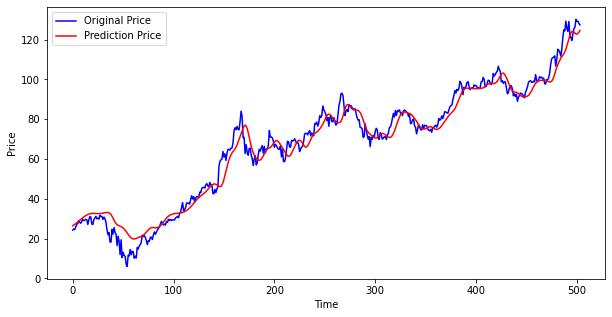

In [36]:
plt.figure(figsize=(10,5))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Prediction Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()